In [1]:
from google.colab import files
import pandas as pd
from tensorflow import keras
from pathlib import Path
import os
from PIL import Image

## Obtener los datos de Kaggle

Vamos a estar trabajando con un dataset de Kaggle correpondiente al [Galaxy Zoo - The Galaxy Challenge](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge).

Tenemos que seguir los siguiente pasos.

1. [Crear una cuenta en kaggle](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F)

2. Una vez logueado a Kaggle, necesitamos obtener una API key. Para ello navegar a [Settigns](https://www.kaggle.com/settings) y hacer click en `Create New Token`. Nos va a ofrecer descargar un archivo `kaggle.json`con nuestra API key

Al ejecutar la siguiente celda les va a permitir subir el archivo descargado `kaggle.json` con su API key de Kaggle a Colab

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucasbignone","key":"d3d92bd4eaa202d9bfcd773b644b75ef"}'}

La siguiente celda crea una carpeta `kaggle` y mueve el archivo `kaggle.json`ahí. Además configura los permisos del archivo

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

La siguiente celda descarga los datos

In [ ]:
!kaggle competitions download --force -c galaxy-zoo-the-galaxy-challenge

100% 1.77G/1.77G [00:12<00:00, 173MB/s]
100% 1.77G/1.77G [00:12<00:00, 149MB/s]


La siguiente celda descomprime los datos

In [ ]:
!unzip /content/galaxy-zoo-the-galaxy-challenge.zip

!unzip /content/training_solutions_rev1.zip

!unzip /content/images_training_rev1.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926425.jpg  
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflati

Veamos como luce una imagen

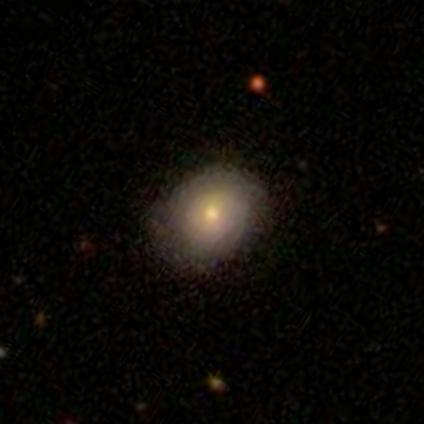

In [ ]:
im = Image.open("/content/images_training_rev1/100008.jpg")

im

## Preprocesamiento de las etiquetas


Exploremos un poco el archivo con las etiquetas

In [ ]:
df = pd.read_csv("/content/training_solutions_rev1.csv")
df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


Vamos a simplificar un poco el problema. En vez de considerar todas las etiquetas, nos vamos a concentrar solo en la primera pregunta de Galaxy Zoo: La imagen muestra
1. Una galaxia esferoide suave
2. Un galaxia de disco con brazos u otras carateristicas
3. No es una galaxia (puede ser una estrella u otra cosa rara

In [ ]:
columnas_que_interesan = ["GalaxyID", "Class1.1",	"Class1.2",	"Class1.3"]

df = df[columnas_que_interesan].copy()

Las columnas `Class1.*` nos indican en realidad la fracción de votantes que eligió clasificar la imagen en cada una de esas categorias. Vamos a simplificar más el problema y vamos a asignar a cada imagen una sola etiqueta, correspondiente a la categoría con la mayor fracción de votantes

In [ ]:
df["label"] = df[["Class1.1",	"Class1.2",	"Class1.3"]].idxmax(axis=1)

df

,GalaxyID,Class1.1,Class1.2,Class1.3,label
0,100008,0.383147,0.616853,0.000000,Class1.2
1,100023,0.327001,0.663777,0.009222,Class1.2
2,100053,0.765717,0.177352,0.056931,Class1.1
3,100078,0.693377,0.238564,0.068059,Class1.1
4,100090,0.933839,0.000000,0.066161,Class1.1
...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,Class1.1
61574,999950,0.901216,0.098784,0.000000,Class1.1
61575,999958,0.202841,0.777376,0.019783,Class1.2
61576,999964,0.091000,0.909000,0.000000,Class1.2


## Preprocesamiento del dataset

Vamos a reacomodar los archivos para que nos sea más fácil cargarlos. Para ello, vamos a mover cada imagen a subcarpetas correspondiente a cada etiqueta  disponible.

Al finalizar, la estructura de archivos quedará algo asi:

- /content/images_training_rev1/Class1.1
  - a.jpg
  - b.jpg
  - c.jpg
  - ...
- /content/images_training_rev1/Class1.2
  - d.jpg
  - e.jpg
  - f.jpg
  - ...
- /content/images_training_rev1/Class1.3
  - g.jpg
  - h.jpg
  - i.jpg
  - ...

In [ ]:
for label_name, group in df.groupby("label"):   #  Acá agrupamos las filas con etiquetas iguales e iteramos sobre cada uno de los grupos de filas que que se forman

  dest_path = Path(f"/content/images_training_rev1/{label_name}").mkdir(parents=True, exist_ok=True)  # Esto crea la subcarpeta correspondiente a la etiqueta

  for row_name, row in group.iterrows():        # Acá iteramos sobre las filas del grupo de galaxias con una etiqueta específica
    GalaxyID = row.GalaxyID                     # Acá extraemos el ID de cada galaxia

    image_path = Path(f"/content/images_training_rev1/{GalaxyID:d}.jpg")        # Obtenemos el path original al archivo

    image_path.rename(f"/content/images_training_rev1/{label_name}/{GalaxyID:d}.jpg")   # Esto mueve el archivo

In [ ]:
ls /content/images_training_rev1

Class1.1/  Class1.2/  Class1.3/


## Carga de datos usando keras

Vamos a utilizar una funcion de keras (`keras.utils.image_dataset_from_directory`) para crear el dataset de entrenamiento.  Más información al respecto [aquí](https://keras.io/api/data_loading/) y [aquí](https://keras.io/api/data_loading/image/#image_dataset_from_directory-function).


Noten que en realidad, la funcion nos devuelve dos datasetes, uno de entrenamiento y otro de validación. La fraccion de datos a usar para entrenamiento se configura con el argumento ǜalidation_split`

In [ ]:
training_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/images_training_rev1',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.3,    #
    subset="both",
    seed=42,
)

Found 61578 files belonging to 3 classes.
Using 43105 files for training.
Using 18473 files for validation.


## Entrenando un modelo prefrabicado.

Vamos a probar entrenando un modelo tipo Xception de la libreria de Keras

In [ ]:
# Cargamos la arquitectura del modelo

model = keras.applications.Xception(
    weights=None, input_shape=(256, 256, 3), classes=3)

In [ ]:
# Visualizamos la arquitectura

model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 127, 127, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 127, 127, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
# Entrenamos durante 1 época

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')
model.fit(training_dataset, epochs=1, validation_data=validation_dataset)

Epoch 1/10
1348/1348 [==============================] - 916s 653ms/step - loss: 0.4750 - accuracy: 0.7888 - val_loss: 0.8561 - val_accuracy: 0.7143
Epoch 2/10
1347/1348 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8332

KeyboardInterrupt: ignored